This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #Only keep 10000 most frequently occurring words in the training data

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0] #1 stands for positive review and 0 stands for negative review

1

In [4]:
max([max(sequence) for sequence in train_data]) #Make sure no word index will exceed 10,000

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

1654784/1641221 [==============================] - 0s 0us/step


Indiceds are offset by 3 because 0, 1 and 2 are reserved indiced for "padding", "start of sequence" and "unknown".

In [6]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### Preparing the data

We will encoding the integer sequences via multi-hot encoding to ensure that all the sequences (data points) have the same length. 

Here it should be 10000 or we need a tensor of shape (samples, max_length) - (25000, 10000)

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# for i, sequence in enumerate(train_data):
len(train_data[3])

550

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 44ms/step - loss: 0.5228 - accuracy: 0.7773 - val_loss: 0.3905 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3090 - accuracy: 0.9041 - val_loss: 0.3042 - val_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2270 - accuracy: 0.9262 - val_loss: 0.2804 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1779 - accuracy: 0.9432 - val_loss: 0.3130 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1441 - accuracy: 0.9541 - val_loss: 0.2782 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1182 - accuracy: 0.9634 - val_loss: 0.3339 - val_accuracy: 0.8750
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0990 - accuracy: 0.9711 - val_loss: 0.3063 - val_accuracy: 0.8846
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

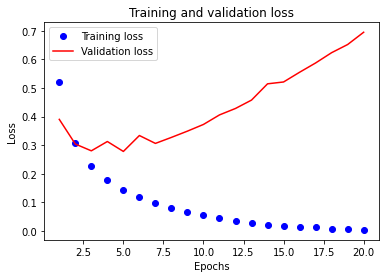

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

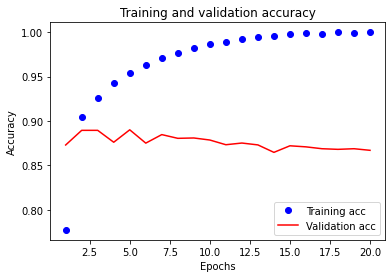

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we can see, our model performance starts getting worse from 4th epoch. 

We will retrain a model from scratch to avoid overfitting.

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4845 - accuracy: 0.8105
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2833 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2151 - accuracy: 0.9247
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3073 - accuracy: 0.8781


In [21]:
results #Format: [Test Loss, Test Accuracy]

[0.3072998821735382, 0.8780800104141235]

### Using a trained model to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.18177085],
       [0.99706537],
       [0.6626265 ],
       ...,
       [0.09392534],
       [0.04889357],
       [0.3680643 ]], dtype=float32)

The model is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [23]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [24]:
len(train_data)

8982

In [25]:
len(test_data)

2246

In [26]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [29]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [28]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [30]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
x_train.shape

(8982, 10000)

**Encoding the labels**

In [32]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [33]:
y_train.shape

(8982, 46)

In [ ]:
from tensorflow.keras.utils import to_categorical #Built-in method for one-hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

We use one-hot encoding to convert categorical data to numerical data instead of integer encoding because there is no ordinal relationshiops between our labels. 

### Building your model

**Model definition**

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [35]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6192 - accuracy: 0.5117 - val_loss: 1.7703 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4361 - accuracy: 0.7083 - val_loss: 1.3249 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0535 - accuracy: 0.7783 - val_loss: 1.1473 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8232 - accuracy: 0.8319 - val_loss: 1.0681 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6536 - accuracy: 0.8666 - val_loss: 0.9913 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5246 - accuracy: 0.8920 - val_loss: 0.9438 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4217 - accuracy: 0.9114 - val_loss: 0.9167 - val_accuracy: 0.8130
Epoch 8/20
16

**Plotting the training and validation loss**

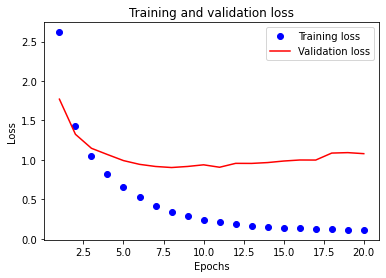

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

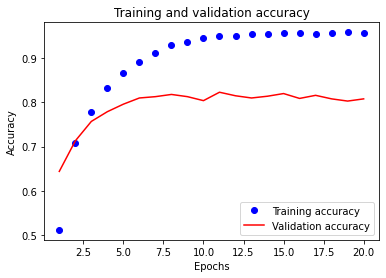

In [40]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [41]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.4275 - accuracy: 0.5341
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3245 - accuracy: 0.7037
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9795 - accuracy: 0.7861
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7609 - accuracy: 0.8378
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5964 - accuracy: 0.8734
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4724 - accuracy: 0.9012
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3783 - accuracy: 0.9182
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3116 - accuracy: 0.9329
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9588 - accuracy: 0.7956


In [42]:
results

[0.958761990070343, 0.7956367135047913]

In [43]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

### Generating predictions on new data

In [44]:
predictions = model.predict(x_test)

In [47]:
predictions[0].shape

(46,)

In [48]:
np.sum(predictions[0])

1.0

In [49]:
np.argmax(predictions[0]) #The largest entry is the predicted class in 46 classes with highest probability

3

### A different way to handle the labels and the loss

In [50]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.8065 - accuracy: 0.2575 - val_loss: 2.0339 - val_accuracy: 0.6040
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.6644 - accuracy: 0.6409 - val_loss: 1.5545 - val_accuracy: 0.6540
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3276 - accuracy: 0.6775 - val_loss: 1.4067 - val_accuracy: 0.6720
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1449 - accuracy: 0.6972 - val_loss: 1.3587 - val_accuracy: 0.6870
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0169 - accuracy: 0.7390 - val_loss: 1.3135 - val_accuracy: 0.7040
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9226 - accuracy: 0.7573 - val_loss: 1.2777 - val_accuracy: 0.7190
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8430 - accuracy: 0.7765 - val_loss: 1.3127 - val_accuracy: 0.7140
Epoch 8/20
63/63 [=

There is an significant drop in our model accuracy since we are trying to compress a lot of information in a low-dimensional representation.

### Wrapping up

- If we encode labels via one-hot encoding, you should use categorical_crossentropy as a loss function.
- If we encode labels as integers, you should use sparse_categorical_crossentropy loss function.

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary